<a href="https://colab.research.google.com/github/minseok203/python/blob/main/python_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [53]:
# Python3 샘플 코드 #


import requests

url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'
params ={'serviceKey' : 'dwVfOXdBtqYRjx1+Jco1HkGzcePgJHc5HeXkPcI/qGlma3qQKUOyUPbsc1CtMG3dcOrAY1Ib7Yx0OEeQwtGFKA==', 'pageNo' : '1', 'numOfRows' : '990', 'dataType' : 'JSON', 'dataCd' : 'ASOS', 'dateCd' : 'HR', 'startDt' : '20230301', 'startHh' : '01', 'endDt' : '20230331', 'endHh' : '23', 'stnIds' : '108' }

response = requests.get(url, params=params)
print(response.content)

b'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"tm":"2023-03-01 01:00","rnum":"1","stnId":"108","stnNm":"\xec\x84\x9c\xec\x9a\xb8","ta":"6.1","taQcflg":"","rn":"","rnQcflg":"","ws":"0.1","wsQcflg":"","wd":"0","wdQcflg":"","hm":"68","hmQcflg":"","pv":"6.4","td":"0.6","pa":"1013.1","paQcflg":"","ps":"1023.7","psQcflg":"","ss":"","ssQcflg":"9","icsr":"","dsnw":"","hr3Fhsc":"","dc10Tca":"6","dc10LmcsCa":"6","clfmAbbrCd":"","lcsCh":"9","vs":"2000","gndSttCd":"","dmstMtphNo":"","ts":"3.6","tsQcflg":"","m005Te":"4.3","m01Te":"3.9","m02Te":"3.5","m03Te":"3.5"},{"tm":"2023-03-01 02:00","rnum":"2","stnId":"108","stnNm":"\xec\x84\x9c\xec\x9a\xb8","ta":"6.2","taQcflg":"","rn":"","rnQcflg":"","ws":"1.6","wsQcflg":"","wd":"270","wdQcflg":"","hm":"69","hmQcflg":"","pv":"6.5","td":"0.9","pa":"1012.9","paQcflg":"","ps":"1023.5","psQcflg":"","ss":"","ssQcflg":"9","icsr":"","dsnw":"","hr3Fhsc":"","dc10Tca":"8","dc10LmcsCa":"8","clfmAbb

In [54]:
import json
json_file=json.loads(response.text)

In [55]:
import pandas as pd
from pandas import json_normalize

df=json_normalize(json_file['response']['body']['items']['item'])
df

,tm,rnum,stnId,stnNm,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,...,lcsCh,vs,gndSttCd,dmstMtphNo,ts,tsQcflg,m005Te,m01Te,m02Te,m03Te
0,2023-03-01 01:00,1,108,서울,6.1,,,,0.1,,...,9,2000,,,3.6,,4.3,3.9,3.5,3.5
1,2023-03-01 02:00,2,108,서울,6.2,,,,1.6,,...,10,2000,,,3.5,,4.2,3.8,3.5,3.6
2,2023-03-01 03:00,3,108,서울,6.0,,,,1.1,,...,11,2000,,,3.0,,4.2,3.8,3.5,3.6
3,2023-03-01 04:00,4,108,서울,5.8,,,,1.8,,...,10,2000,,,3.2,,4.1,3.8,3.5,3.6
4,2023-03-01 05:00,5,108,서울,5.7,,,,1.5,,...,8,1934,,,3.3,,4.1,3.7,3.5,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2023-03-31 19:00,739,108,서울,18.0,,,,3.1,,...,,1691,,,14.2,,15.9,14.9,13.1,11.7
739,2023-03-31 20:00,740,108,서울,16.2,,,,3.0,,...,,1808,,,12.2,,15.2,14.7,13.2,11.9
740,2023-03-31 21:00,741,108,서울,14.8,,,,2.4,,...,,1782,,,10.6,,14.6,14.3,13.2,12.1
741,2023-03-31 22:00,742,108,서울,14.0,,,,1.8,,...,,1655,,,9.4,,14.0,13.9,13.2,12.2


Text(0.5, 1.0, '서울 기온(230301~230331)')

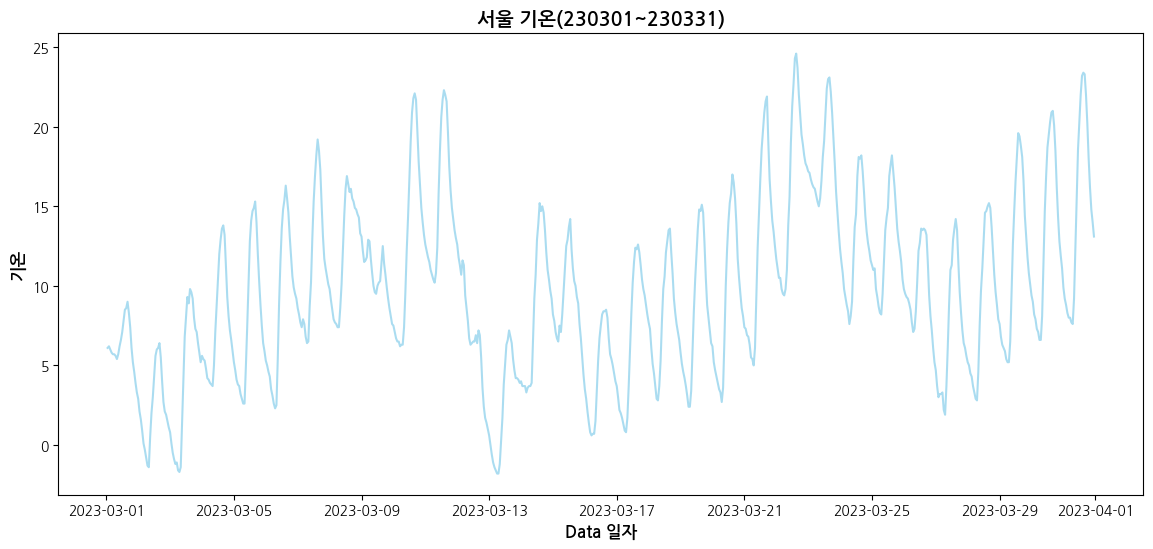

In [56]:
#2023년 3월 기온 그래프

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #폰트 관련 용도

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

df['tm']=pd.to_datetime(df['tm'])
df['ta']=pd.to_numeric(df['ta'], downcast='float') 
fig=plt.figure(figsize=(14,6))

ax=plt.subplot(1,1,1)
ax.plot(df['tm'], df['ta'], color='skyblue', lw=1.5, alpha=0.7)

ax.set_ylabel('기온', fontweight='bold', fontsize=12)
ax.set_xlabel('Data 일자', fontweight='bold', fontsize=12)
ax.set_title('서울 기온(230301~230331)', fontweight='bold', fontsize=14)

In [57]:
df.to_csv("output.csv")

In [38]:

import requests

url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'
params ={'serviceKey' : 'dwVfOXdBtqYRjx1+Jco1HkGzcePgJHc5HeXkPcI/qGlma3qQKUOyUPbsc1CtMG3dcOrAY1Ib7Yx0OEeQwtGFKA==', 'pageNo' : '1', 'numOfRows' : '990', 'dataType' : 'JSON', 'dataCd' : 'ASOS', 'dateCd' : 'HR', 'startDt' : '20130301', 'startHh' : '01', 'endDt' : '20130331', 'endHh' : '01', 'stnIds' : '108' }

response = requests.get(url, params=params)
print(response.content)

b'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"tm":"2013-03-01 01:00","rnum":"1","stnId":"108","stnNm":"\xec\x84\x9c\xec\x9a\xb8","ta":"6.5","taQcflg":"0","rn":"","rnQcflg":"9","ws":"2.9","wsQcflg":"0","wd":"270","wdQcflg":"0","hm":"82","hmQcflg":"0","pv":"7.9","td":"3.6","pa":"1001.4","paQcflg":"0","ps":"1011.9","psQcflg":"0","ss":"","ssQcflg":"9","icsr":"","dsnw":"","hr3Fhsc":"","dc10Tca":"10","dc10LmcsCa":"8","clfmAbbrCd":"StNs","lcsCh":"7","vs":"700","gndSttCd":"","dmstMtphNo":"01","ts":"4.6","tsQcflg":"0","m005Te":"4.8","m01Te":"2.7","m02Te":"0.2","m03Te":"0.2"},{"tm":"2013-03-01 02:00","rnum":"2","stnId":"108","stnNm":"\xec\x84\x9c\xec\x9a\xb8","ta":"6.1","taQcflg":"0","rn":"","rnQcflg":"9","ws":"2.0","wsQcflg":"0","wd":"230","wdQcflg":"0","hm":"82","hmQcflg":"0","pv":"7.7","td":"3.2","pa":"1000.7","paQcflg":"0","ps":"1011.2","psQcflg":"0","ss":"","ssQcflg":"9","icsr":"","dsnw":"","hr3Fhsc":"","dc10Tca":"10","

In [39]:
import json
json_file=json.loads(response.text)

In [58]:
import pandas as pd
from pandas import json_normalize

df=json_normalize(json_file['response']['body']['items']['item'])
df

,tm,rnum,stnId,stnNm,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,...,lcsCh,vs,gndSttCd,dmstMtphNo,ts,tsQcflg,m005Te,m01Te,m02Te,m03Te
0,2023-03-01 01:00,1,108,서울,6.1,,,,0.1,,...,9,2000,,,3.6,,4.3,3.9,3.5,3.5
1,2023-03-01 02:00,2,108,서울,6.2,,,,1.6,,...,10,2000,,,3.5,,4.2,3.8,3.5,3.6
2,2023-03-01 03:00,3,108,서울,6.0,,,,1.1,,...,11,2000,,,3.0,,4.2,3.8,3.5,3.6
3,2023-03-01 04:00,4,108,서울,5.8,,,,1.8,,...,10,2000,,,3.2,,4.1,3.8,3.5,3.6
4,2023-03-01 05:00,5,108,서울,5.7,,,,1.5,,...,8,1934,,,3.3,,4.1,3.7,3.5,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2023-03-31 19:00,739,108,서울,18.0,,,,3.1,,...,,1691,,,14.2,,15.9,14.9,13.1,11.7
739,2023-03-31 20:00,740,108,서울,16.2,,,,3.0,,...,,1808,,,12.2,,15.2,14.7,13.2,11.9
740,2023-03-31 21:00,741,108,서울,14.8,,,,2.4,,...,,1782,,,10.6,,14.6,14.3,13.2,12.1
741,2023-03-31 22:00,742,108,서울,14.0,,,,1.8,,...,,1655,,,9.4,,14.0,13.9,13.2,12.2


Text(0.5, 1.0, '서울 기온(130301~130331)')

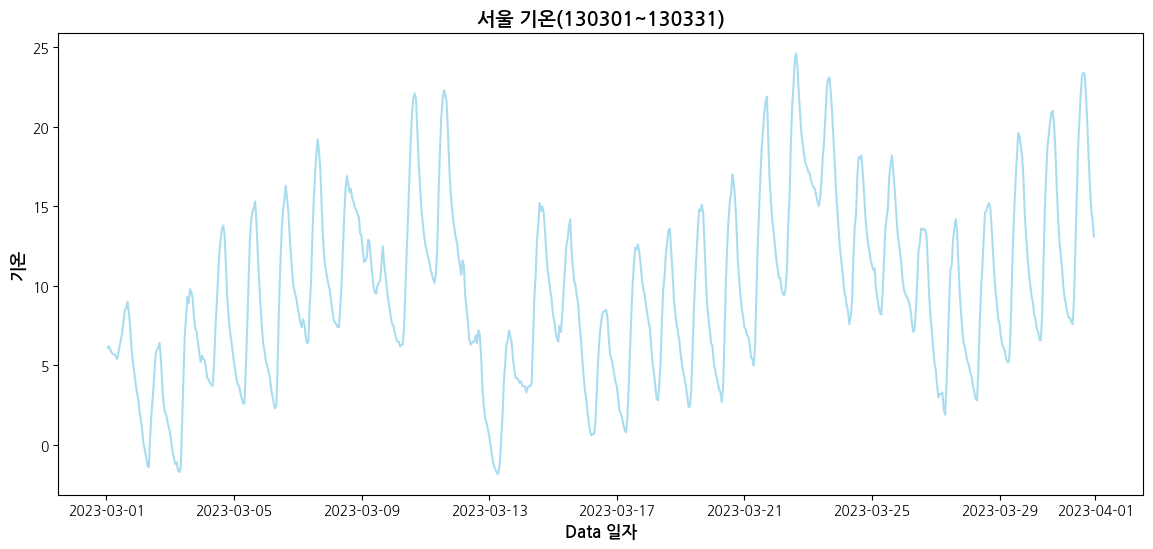

In [59]:
#2013년 3월 기온 그래프

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #폰트 관련 용도

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

df['tm']=pd.to_datetime(df['tm'])
df['ta']=pd.to_numeric(df['ta'], downcast='float') 
fig=plt.figure(figsize=(14,6))

ax=plt.subplot(1,1,1)
ax.plot(df['tm'], df['ta'], color='skyblue', lw=1.5, alpha=0.7)

ax.set_ylabel('기온', fontweight='bold', fontsize=12)
ax.set_xlabel('Data 일자', fontweight='bold', fontsize=12)
ax.set_title('서울 기온(130301~130331)', fontweight='bold', fontsize=14)

In [47]:
df.to_excel("C:\\Users\\82103\\OneDrive\\바탕 화면\\output.xlsx")
df.to_csv("output.csv")